## Accessing Data from Veda

Veda stores machine learning data collections. These can be generated from DigitalGlobe’s satellite imagery, or can be imported from other sources. For example, Veda hosts copies of the XView dataset.

So how do you get that data out of Veda and into your models?

### Veda’s Data Storage

Let’s start with looking at how Veda stores data.

<div class="alert alert-warning">
The language used here is in flux - we use collection and dataset to mean the same thing. Similarly, sample and datapoint get interchanged.
</div>

### Samples

The basic unit of training data is called a sample. It consists of an image, and a label that describes the features in the image. Veda supports three types of labels:

- Classification
- Object Detection
- Segmentation

**Classification** labels indicate whether a class of features exists in the image. The value is a boolean, where a true value for a class means the class is present.

**Object Detection** labels describe where features are located, if they are in the image. The value is a bounding box of pixel values, so each label would indicate where in the image the class feature exists.

**Segmentation** labels are similar to Object Detection labels, but instead of a bounding box, the feature is described by a polygon object that can trace the outline of the feature.

Sample objects also store geospatial information if it’s known. Any data generated by Veda will have spatial data, but it’s also possible to import ungeoreferenced images.

See the Label Formats section for more information about how labels are used in pyveda.

### Collections

All of the samples are stored in groups called collections that keep things sorted and organized. A collection would group data around a theme or area. Collections have unique names to identify them. They also enforces consistency in the data. Some of the requirements of a collection are:

- All images must be the same size in pixels
- All images must have the same number of bands
- All images must share the same data type
- All labels must be the same type - classification, object detection, or segmentation.

Collections also track their contents. A collection knows all of the classes represented in the samples’ labels. It also tracks the spatial bounds of all the samples.

### Finding Collections with pyveda

The first step to working with data stored in Veda is to find a collection to work with. If you’re following a tutorial or a notebook the name of the collection should be given. You can use the name to access the collection. This is covered in the section Accessing Collections.

If you’d like to find a collection to investigate, pyveda has the search method (see pyveda.main.search()). Let’s start with the simplest example:

In [2]:
import pyveda as pv

pv.search()[:5]

[VedaCollectionProxy of Austin Segmentation (1245073f-dae9-40ac-ac5c-52ca349ae8dd),
 VedaCollectionProxy of Clouds Classification (bulkload) (4cf03238-e5f6-48ca-a28c-fc742345f698),
 VedaCollectionProxy of Kaggle Amazon Small (97c03bd9-d83d-43c5-8dde-ceaf14e071bf),
 VedaCollectionProxy of Austin Obj Detection (e8cda011-e92d-4b99-80f5-28e628588bc8),
 VedaCollectionProxy of Kaggle Amazon Small (92e271dd-cc72-49e3-bf3d-26c0ada58531)]

The search method searches Veda for collections and can take key words and filters. It returns a list of VedaCollectionProxy objects, which is a pyveda object that acts as an entry point to working with the collection. We can take a closer look at the collections returned by the search:

In [3]:
results = pv.search()
print(results[0])

Austin Segmentation (1245073f-dae9-40ac-ac5c-52ca349ae8dd)
	- Bounds: [-97.767934, 30.265703, -97.733246, 30.271354]
	- Count: 250 samples, 100% cached
	- Chips: 256x256, 3 bands uint8
	- Labels: segmentation type, 1 class



These collection objects have an informative `__str__` method that prints collection details in a readable format. You can use the `repr` function to print the shorter representation of just the name and ID.

To search for terms, pass them to the search function:

In [ ]:
pv.search('Austin')

Filters can also be added. The queries use ElasticSearch syntax:

In [ ]:
# TODO
pv.search('Austin')

## Accessing Collections
If you have a run a search, you can work directly on the VedaCollectionProxies returned by the search.

In [7]:
results = pv.search()
collection = results[0] # get the first search result
# do something with the collection

If you have a name or ID of a collection, you can access it with these methods:

In [9]:
collection = pv.from_name('Austin Segmentation')

collection = pv.from_id('1245073f-dae9-40ac-ac5c-52ca349ae8dd')

print(collection)

Austin Segmentation (1245073f-dae9-40ac-ac5c-52ca349ae8dd)
	- Bounds: [-97.767934, 30.265703, -97.733246, 30.271354]
	- Count: 250 samples, 100% cached
	- Chips: 256x256, 3 bands uint8
	- Labels: segmentation type, 1 class



## Working with the Samples
Once you have a collection in the form of a VedaCollectionProxy, you can treat it like a list of datapoints. It supports indexing and slicing:

In [10]:
sample = collection[0] # the first sample
print(sample)

{'mltype': 'segmentation', 'cached': 'true', 'dataset_id': '1245073f-dae9-40ac-ac5c-52ca349ae8dd', 'bounds': [-97.74184363143011, 30.270496899310096, -97.74107094008983, 30.271269590650377], 'dtype': 'uint8', 'tile_coords': [962, 178], 'sha': '36e016e0e9db8ce7d8c8b579ec91d53e6dd5d6dc77506b4d5b483f0e37dce685', 'queue': 'b98i8k5ca8m6', 'rda_template': '87856bc985e698e4eb5d0c7784771c8fb5117ad818c4cfe35e5e8a80e7269eb2', 'id': '8728c1fd-533a-4f5c-bc60-4dee90d3ad2f', 'label': {'building': [{'type': 'Polygon', 'coordinates': [[[0, 5], [4, 6], [0, 18], [0, 5]]]}, {'type': 'Polygon', 'coordinates': [[[68, 188], [223, 231], [213, 256], [43, 256], [68, 188]]]}]}, 'classes': ['building']}


If you look representation of the sample object, you’ll see it’s metadata and label data. We can also look at the some of the sample’s specific properties:

In [12]:
print(sample.classes)
print(sample.label)

['building']
{'building': [{'type': 'Polygon', 'coordinates': [[[0, 5], [4, 6], [0, 18], [0, 5]]]}, {'type': 'Polygon', 'coordinates': [[[68, 188], [223, 231], [213, 256], [43, 256], [68, 188]]]}]}


We can also look at the sample's image data, which is returned as a numpy array:

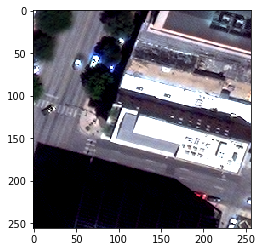

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(sample.image)

To browse the samples in a collection, use the `preview()` method:

In [ ]:
# this is an interactive widget
# so it's not displayed in the docs
collection.preview()

The sample object also has some basic CRUD methods:

```python
# a modified label
label = {buildings: [.......
# update the sample with the new label
sample.update(label)

#delete a sample
sample.delete()
```

### Using Samples with Models

In most machine learning examples, you have to download all of the sample image files and labels to a local directory. Then you have to split up your data into training and testing groups, and probably also convert the data into array formats that can be read as inputs.

We saw in the previous section how to look at the samples in the collection. So what’s the best way to get that sample data to your model? You could certainly loop through all the samples and save their images and labels to files.

Pyveda does provide a way to download the image and label files - see the Releases section. Pyveda makes it easy to get the data in this format - with a single command you get a link to download the compressed file. But pyveda also provides better ways to access the data locally.

To fetch a local cache of the data, use the `store` method. This downloads the sample data to a local file called a VedaBase. Instead of directories of images, Vedabases are single files that hold optimized sample data. All of the sample points have been converted to the correct array formats: the images are numpy arrays, and the labels are one-hot encoded. The store method takes a collections name or ID, and a path to store the file to. It then uses a multithreaded downloader to fetch all the data. You will need to wait for this step to complete before proceeding.



In [ ]:
pv.store('./lasvegas.vdb', dataset_name='Las Vegas Buildings (SpaceNet2)')

You can open a saved VedaBase with the `open` function. We recommend using a Vedabase with a context manager:

In [ ]:
with pv.open(filename='./lasvegas.vdb') as data:
    # do something with the data

When used as a context manager you still will have to wait for the data to download locally before the rest of the code executes.

### Collection Groups

VedaBases internally store separate training, validation, and testing groups, so you don’t have to divide the data. The ratio of sample is each group is set by the `partition` property of the collection.

Each group is an accessor on the collection. You can access samples in the group just like a list, through iteration or indexing. The value returned is an `(image, label)` tuple. As mentioned above, the image and label have been coverted to the appropriate arrays already.

In [ ]:
data.train[0] # the first sample in the training group

for image, label in data.test:
    # do something with each image and label in the testing group

The collection also lets you access the images and labels separately:

In [ ]:
for label in data.test.labels:
    # do something with just each label in the testing group

This means that a typical training example might look like:

```python
from SuperMLDetector import MegaModel

megamodel = MegaModel()

with pv.open(filename='./lasvegas.vdb') as data:
    megamodel.train(data.train)
    megamodel.score(data.test)
```

## Batching and Transforming Data

Pyveda includes tools for batching and transforming data. The three groups have a `batch_generator` method that returns a generator that emits batches of data. Optionally the generator can randomly flip the sample, rescale the values of the image, and move the channel data to the end of the numpy array. The basic use of the generator is to pass the size of the batch.



In [ ]:
# generate batches of 32 samples
gen = vb.train.batch_generator(32)

for x, y in gen:
    # x and y will have a length of 32

The batcher takes the following optional arguments:

- **shuffle** (Boolean): return the samples in the group in random order. Default is True.
- **channels_last** (Boolean): return image data as Height-Width-Depth. Default is False (RDA returns imagery with the bands last).
- **rescale** (Boolean): rescale image values between 0 and 1. Default is False.
- **flip_horizontal** (Boolean): Randomly flip image and labels horizontally. Default is False.
- **flip_vertical** (Boolean): Randomly flip the image and labels vertically. Default is False.

When using either flip option there is a 50% chance an image will be flipped in a given direction.

To create a batcher that will return 16 samples at a time, rescaled to a range of 0 to 1, and flipped randomly in either direction:

In [ ]:
gen = vb.train.batch_generator(16, rescale=True, flip_horizontal=True, flip_vertical=True)

### Streaming Remote Data

<div class='alert alert-warning'>
This direct access will probably be removed so that data can be accessed on demand while being locally cached. Because the samples aren’t cached, they are loaded every time they are accessed. Using this over many epochs will be slower than saving a local file.
</div>

For preliminary testing, or algorithms that only need to work with the datapoints once, it’s possible to open the collection directly from Veda, and the samples are loaded on demand. This uses the same open function as loading a local file, and data is accessed in the same manner.

In [ ]:
with pv.open(dataset_name='Las Vegas Buildings (SpaceNet2)') as data:
    # do something with the data or

with pv.open(dataset_id='84810fa8-87e2-4f22-9386-4406b4c3add0') as data:
    # do something with the data

## Creating Releases

A Veda Release is a compressed archive of the images and labels stored as individual files. You can see more about the Release format and structure in the Releases section. To generate a release, run:



In [ ]:
collection.release()
